# PROCESSAMENTO DIGITAL DE SINAIS

# Sumário

-[Convolução](#convolução)



# Convolução

A soma de convolução é uma operação de suma importância no contexto de processamento digital de sinais. A partir dessa operação , é possível determinar a saída de um sistema linear qualquer, bastando conhecer a resposta que esse sistema retorna  quando aplicamos um impulso à sua entrada. Dessa forma, podemos escrever a saída do sistema linear disscreto $y(n)$ como:

$$y(n) = \sum _{l = -\infty}^infty x(k) h(n-k)$$

Ou seja, a saída do sistema é equivalente ao resultado da convolução da entrada $x(n)$ com a aresposta ao impulso do sistema $h(n)$

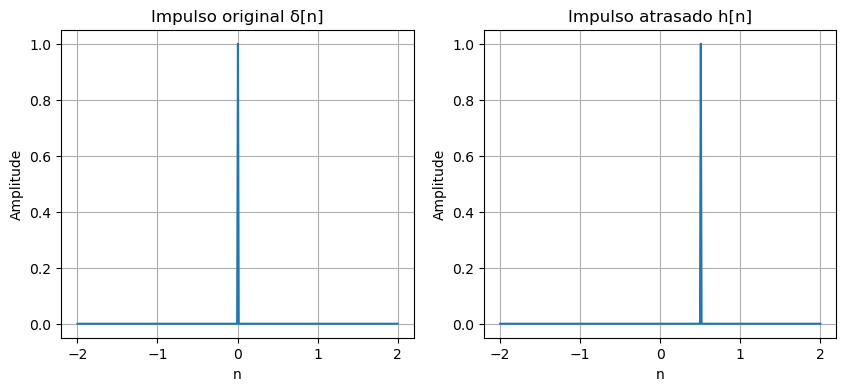

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(-2, 2, 400)
x_n = np.where(np.abs(n) < 0.5, 1, 0)
idx0= np.argmin(np.abs(n-0.0))
delta = np.zeros_like(n)   # cria array do mesmo tamanho que n
delta[idx0] = 1

def H(x):
    """
    Função que desloca o sinal de entrada em 100 amostras.
    """
    N = len(x)
    y = np.zeros_like(x)
    y[100:N] = x[:N-100]
    return y


h_n = H(delta)

fig, axs = plt.subplots(1, 2, figsize=(10,4))

# primeiro subplot: impulso original
axs[0].plot(n, delta)
axs[0].set_title('Impulso original δ[n]')
axs[0].set_xlabel('n')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

# segundo subplot: impulso atrasado
axs[1].plot(n, h_n)
axs[1].set_title('Impulso atrasado h[n]')
axs[1].set_xlabel('n')
axs[1].set_ylabel('Amplitude')
axs[1].grid(True)


plt.show()

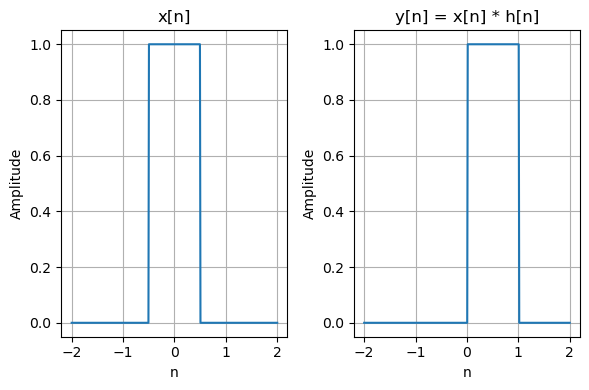

In [ ]:
def Conv_sum(x, h):
    """
    Função que calcula a convolução de dois sinais x e h.
    """
    N = len(x)
    M = len(h)
    y = np.zeros(N + M - 1)

    for n in range(N + M - 1):
            for k in range(N):
                  y[n] += x[k] * h[n-k] if 0 <= n - k < M else 0
    return y

y_n = Conv_sum(x_n, h_n)
#y = np.convolve(x_n, h_n, mode='full')
y_same = y_n[(len(h_n)-1)//2:(len(h_n)-1)//2 + len(x_n)]

t_start = n[0] + n[0]
t_end = n[-1] + n[-1]
t = np.arange(t_start, t_end + dt, dt)
t = t[:len(y_n)]  # garantir mesmo tamanho

# plotando os resultados
fig, axs = plt.subplots(1,2,figsize=(6, 4))
axs[0].plot(n, x_n)
axs[0].set_title('x[n]')
axs[0].set_xlabel('n')
axs[0].set_ylabel('Amplitude')
axs[0].grid(True)

axs[1].plot(n, y_same)
axs[1].set_title('y[n] = x[n] * h[n]')
axs[1].set_xlabel('n')
axs[1].set_ylabel('Amplitude')
axs[1].grid(True)

plt.tight_layout()
plt.show()



